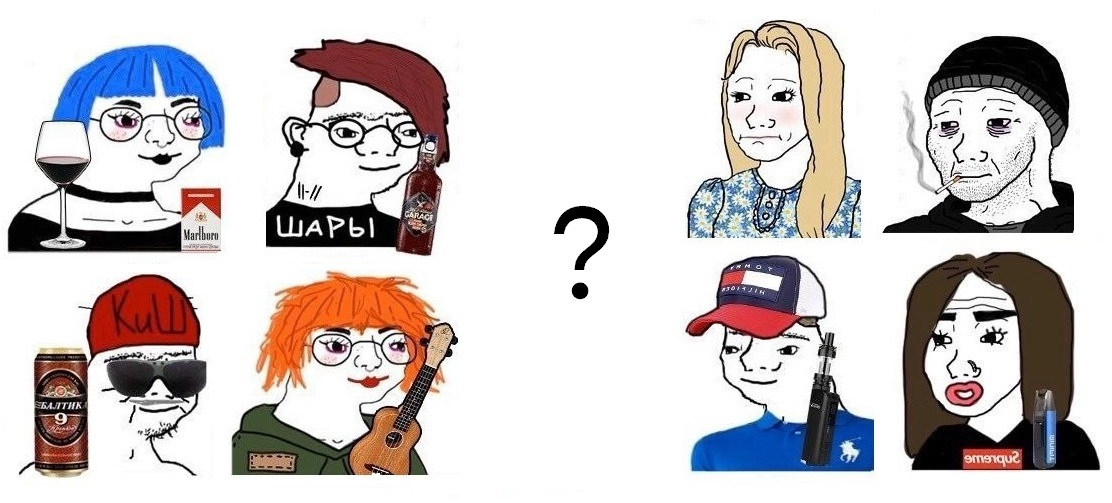

##Добро пожаловать в тест на определение твоего музыкального мемотипа!
##Для его прохождения следуй инструкциям ниже.

###Кликни play в строке ниже, чтобы запустить скрипт теста

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image, ImageFont, ImageDraw 

In [ ]:
!git clone https://github.com/aksenovma1997/music_memetype_test

Cloning into 'psychotype_test'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 5), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
df_path = "/content/psychotype_test/pt_voca.xlsx"
df = pd.read_excel(df_path)
df["group"] = df["group"].astype(str)
df["rate"] = np.nan
df = df.sample(frac=1).reset_index(drop=True)
num_groups = df.shape[0]

In [ ]:
def get_correct_rate(rate):
  if rate.isnumeric() == False:
      rate = np.nan
  else:
    rate = int(rate)
    if rate < 0:
      rate = 0
    elif rate > 3:
      rate = 3
  return rate

In [ ]:
def get_questions(df):
  for index, row in df.iterrows():
    curr_rate = input(row["group"] + ' (' + str(index+1) + '/' + str(num_groups) + ') ')
    df.at[index, "rate"] = get_correct_rate(curr_rate)
  return df

In [ ]:
def change_rate(df):
  while True:
    curr_group = input('Введите название группы ')
    if curr_group in df["group"].values:
      curr_rate = input('Введите вашу оценку ')
      df.loc[df["group"] == curr_group, "rate"] = get_correct_rate(curr_rate)
      print('Оценка поставлена')
      break
    else:
      print('Такой группы нет. Попробуйте снова')
  return df

###Опрос

Сейчас тебе будут предложены музыкальные группы, которые требуется оценить от 0 до 3, где:

*   0 — в моём плейлисте нет треков этой группы
*   1 — в моём плейлисте один-два трека этой группы
*   2 — в моём плейлисте несколько треков этой группы
*   3 — в моём плейлисте куча треков этой группы

Для начала опроса кликни play в следующем блоке...

In [ ]:
df = get_questions(df)

Если ты ошибся и хочешь поменять значение для какой-нибудь группы, кликни play в следующем блоке...

In [ ]:
df = change_rate(df)

###Кликни play в строке ниже, чтобы тест вычислил твой результат

In [ ]:
df = df.sort_values(["type", "rate", "group"], ascending=[True, False, True]).reset_index(drop=True)
df2 = df.groupby("type") \
        .apply(lambda s: pd.Series({ \
                                    "top": ','.join(s[s["rate"] > 0]["group"]) \
                                    , "type_count": s["rate"].count() \
                                    , "type_sum": s["rate"].sum() \
                                    })) \
        .reset_index()
df2["type_percent"] = df2["type_sum"] ** 2 / (df2["type_count"] * 3) / df2["type_sum"].sum()
df2["percent"] = round(df2["type_percent"] * 100 / df2["type_percent"].sum())
df2 = df2.drop(columns=["type_count", "type_sum", "type_percent"])
df2 = df2.sort_values(["percent"], ascending=False).reset_index(drop=True)

In [ ]:
image_path = '/content/psychotype_test/pt' + str(df2.iloc[0]["type"]) + ".png"
result_image = Image.open(image_path)

In [ ]:
schema_path = "/content/psychotype_test/template.jpg"
font_path = "/content/psychotype_test/bsr.OTF"
result_schema = Image.open(schema_path)
draw = ImageDraw.Draw(result_schema)
font = ImageFont.truetype(font_path, 20)

In [ ]:
for index, row in df2.iterrows():
  curr_top = '\n'.join(row["top"].split(',')[:5])
  curr_text = str(int(row["percent"])) + '%\n\n' + curr_top
  x_pos = 250 + ((int(row["type"]) - 1) % 2) * 375
  y_pos = 50 + ((int(row["type"]) - 1) // 2) * 240
  draw.text((x_pos, y_pos), curr_text, fill="black", font=font)

###Результаты

Чтобы показать результат, кликни play в следующем блоке...

In [ ]:
result_image

Чтобы показать расширенный результат, кликни play в следующем блоке...

In [ ]:
result_schema